# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4: Линейные модели, введение в конкурсную задачу


###### <hr\>
**Общая информация**

**Срок сдачи:** 17 апреля 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 17 апреля, -4 балла после 06:00 24 апреля, -6 баллов после 06:00 1 мая

Имеется ввиду именно сдача данного ДЗ, а не конечного результата по конкурсу (см ниже).<br\>
Жесткий дедлайн по конкурсной задаче - 14 мая 23:59 GMT.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Определям, что вам досталось

<center><img src='https://static1.squarespace.com/static/571a6e39b6aa608067028725/t/577988518419c2d62fb5922f/1467582555915/'></center>

Укажите свою фамилию на русском языке в поле ниже.

In [3]:
USER_NAME = u"Петренко".lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)

Имплементируйте обучение логистической регрессии с L1 регуляризацией с помощью метода  Stochastic Gradient Descent (SGD)


#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* В Mini Batch SGD - по подвыборке объектов т.е в алгоритме надо
    * Перемешать выборку
    * Разбить на части (примерно) одинакового размера - мини батчи
    * Считать градиент по мини батчам
* Сделайте убывающую скорость спуска, например `alpha/n_epoch` или `alpha/n_iter` или `alpha/n_batch` или ...
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации/батча/эпохи.
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

## Имплементация (6 баллов)

In [2]:
  def sign(x):
        if (x>0):
            return 1
        elif (x==0):
            return 0
        else:
            return -1
        

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    def gradi(self,x,beta,y):
        a=(x*(np.dot(x,beta)-y))/len(x)
        b=(np.asarray(map(sign,beta))+0.0)/(len(x)*2*self.C)
        return (a+b)
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10,random_state=12,backuping="No"):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.random_state=random_state
        self.backuping=backuping

    
    def fit(self, X, y):
        '''
        Обучение модели
        '''
        X=np.insert(X,0,1,axis=1)
        np.random.seed(self.random_state)
        self.beta=np.random.random_sample((X.shape[1]))
        self.beta=(self.beta+0.0)/(X.shape[1]+0.0)
        newbeta=np.empty(X.shape[1])
        if (self.backuping=="Yes"):
            self.backup=np.empty([self.max_epoch,self.beta.shape[0]])
        for i in xrange(self.max_epoch):
            if (self.backuping=="Yes"):
                self.make_backup(i)
            np.random.shuffle(X)
            for j in xrange(X.shape[0]):
                newbeta=self.beta-(self.alpha/(j+1))*self.gradi(X[j],self.beta,y[j])
                self.beta=newbeta
                #print self.gradi(X[j],self.beta,y[j])

            #print self.beta
            
        return self
    
    
    def make_backup(self,i):
        self.backup[i]=self.beta
        #print self.backup[i]
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
    
    def roundit(self,y):
        if (y>0.5):
            return 1
        else:
            return 0
        
    def predict(self, X):
        X=np.insert(X,0,1,axis=1)
        y_hat=np.asarray(map(self.roundit,np.dot(X,self.beta)))
        '''
        Возвращение метки класса
        '''
        
        return y_hat
    
    def predict_proba(self, X):
        X=np.insert(X,0,1,axis=1)
        '''
        Возвращение вероятности каждого из классов
        '''

        y_hat_proba=np.dot(X,self.beta)
        
        return y_hat_proba

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

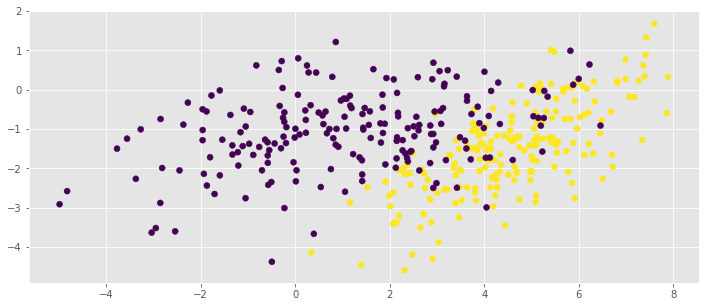

In [25]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)

In [26]:
X.shape

(400L, 2L)

In [27]:
model = MySGDClassifier(backuping="Yes")
model.fit(X, y)

MySGDClassifier(C=1, alpha=0.01, backuping='Yes', max_epoch=10,
        random_state=12)

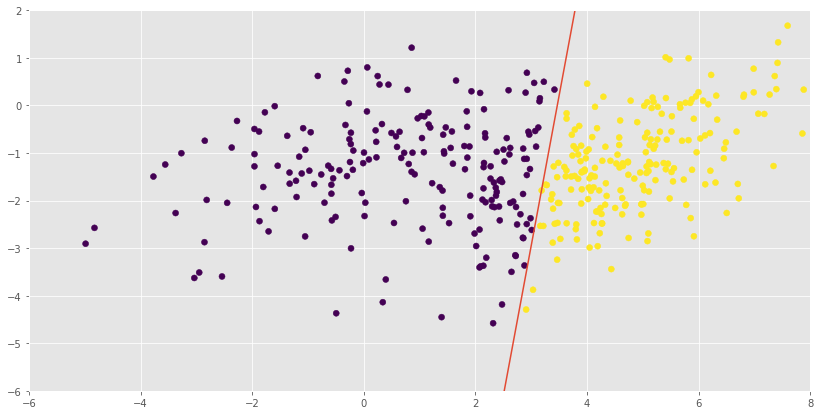

In [9]:

beta=model.backup[9]
fig = plt.figure(figsize=(14, 7))
#ax = fig.add_subplot(1, 2, 1)
plt.axis([-6.0, 8.0,-6.0, 2.0])
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
t=np.arange(-5,9,0.001)
plt.plot(t,(0.5-beta[0]-t*beta[1])/beta[2])

In [10]:
model.predict_proba(X)

array([  7.83063388e-01,   1.11021230e+00,   5.29301951e-01,
         6.65639663e-01,   7.50468805e-01,   9.48765615e-01,
         7.12822900e-01,   7.46307902e-01,   6.65713637e-01,
         5.23418470e-01,   7.50272298e-01,   5.54391553e-01,
         4.48184339e-01,   6.42265259e-01,   9.77248495e-01,
         7.49222567e-01,   2.92075276e-01,   6.98750448e-01,
         9.22098499e-01,   6.12887882e-01,   3.93192240e-01,
         1.00670584e+00,   5.85424105e-01,   7.97310372e-01,
         6.06828437e-01,   7.31418865e-01,   4.47571273e-01,
         7.55148125e-01,   7.33537689e-01,   5.97101628e-01,
         5.96988059e-01,   3.40697782e-01,   6.04867366e-01,
         7.31915578e-01,   6.69026255e-01,   7.13588552e-01,
         4.68030336e-01,   5.56491798e-01,   5.52614887e-01,
         6.80827066e-01,   8.21824564e-01,   3.99622117e-01,
         1.05559640e+00,   6.64566355e-01,   8.52085800e-01,
         8.95614165e-01,   8.61296319e-01,   8.13906202e-01,
         1.00784601e+00,

## Анализ сходимости (2 балл)

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/батча/эпохи (выбрать одно) для разных `alpha`.

In [11]:
from math import fabs

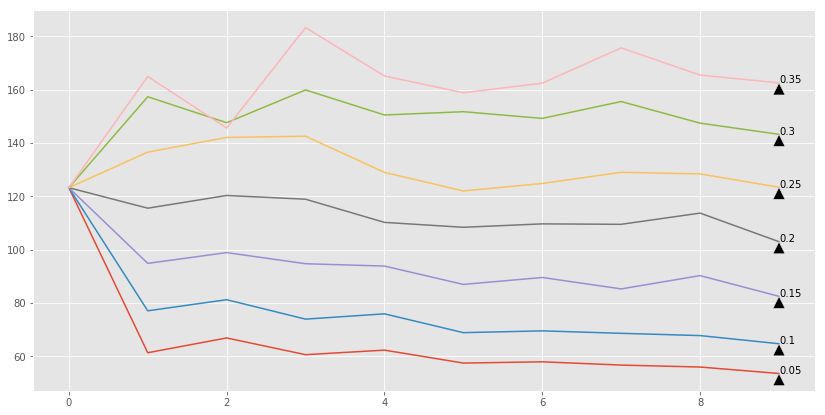

In [12]:
def Losses(X,b,y):
    X=np.insert(X,0,1,axis=1)
    l=(np.dot(X,b.T)).T
    for i in xrange(b.shape[0]):
        l[i]-=y
        l[i]=l[i]*l[i]
    l=np.sum(l,axis=1)
    n=np.sqrt(b**2)
    n=np.sum(n,axis=1)
    return l+n
fig = plt.figure(figsize=(14, 7))
for alpha in np.arange(0.05,0.4,0.05):
    t=range(0,10,1)
    model = MySGDClassifier(alpha=alpha,backuping="Yes")
    model.fit(X, y)
    loss=Losses(X,model.backup,y)
    plt.plot(t,loss)
    plt.annotate(alpha, xy=(t[9],loss[9]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

# Введение в конкурсную задачу

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная он-лайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите youtube или поиграйте сами (но не долго =) ).

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в heartstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**

### Правила
* Объединяться в команды по правилам конкурса можно, но по правилам нашего курса - нельзя)
* Вы можете использовать любой алгоритм, даже неизученный в нашем курсе (если на защите сможете объяснить как он работает)
* Имейте ввиду, что вы должны отправить результаты строго до 14 мая 23:59 GMT на сайт соревнования (раздел submission). Без результата в leaderboard оценка выставлена не будет.

## Данные

Для того, чтобы получить данные необходимо зарегистрироваться на сайте соревнования. 

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


Данные поставляются в двух форматах:
* В формате json содержится полная информация по текущему состоянию раунда
* В табличном формате упрощенная аггрерированная информация по текущему состоянию раунда

В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

## Работа с простыми табличными данными (1 балл)

По соображениям сокращения времени вычислений, проделаем основные шаги по одной части данных.

Если данные не будут помещаться вам с оперативную память, рекомендуется совершить предобработку в python, а  моделирование выполнять с помощью [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit).

In [30]:
# Загрузка данных целиком
# df_list = []
# for chunk in range(1,5):
#     filepath = './trainingData_tabular_chunk%d.csv' % chunk
#     df_list.append(pd.read_csv(filepath, sep=','))

# df_data = pd.concat(df_list)

# Загрузка одной части данных
filepath = './trainingData_tabular_chunk1.csv'
df_data = pd.read_csv(filepath, sep=',')

In [31]:
df_data.shape

(500000, 45)

In [32]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [7]:
df_data.head(n=10).T

gamestate_id,4687346,3270826,3189487,4098946,2661127,2993360,4378268,3774658,3956442,2958739
decision,1,1,1,1,0,0,0,1,1,1
turn,14,7,5,8,13,13,9,2,12,10
opponent_armor,0,0,3,0,0,0,0,0,2,0
opponent_attack,0,0,0,0,0,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25,612,612,390,1235,1235
opponent_hp,5,22,29,26,30,26,20,30,18,16
opponent_special_skill_used,0,0,0,0,0,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10,10,9,1,10,9
opponent_crystals_current,10,6,1,7,1,3,2,1,2,1


In [33]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

0.504702

#### Задание

* Определите количество уникальных карт героя у игрока и оппонента.
* Преобразуйте категориальные переменные с помощьб one-hot кодирования, добавьте к датасету и удалите прежние столбцы

In [34]:
df_data["player_hero_card_id"].nunique()

9

In [35]:
df_data["opponent_hero_card_id"].nunique()

9

In [36]:
df_data.index=range(0,df_data.shape[0])

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
one=OneHotEncoder(sparse=False)

In [39]:
new_features=one.fit_transform(df_data["player_hero_card_id"].values.reshape(-1,1))
tmp=pd.DataFrame(data=new_features,columns=['hero_card' + str(i) for i in range(new_features.shape[1])])
newdata=pd.concat([df_data,tmp],axis=1)

In [40]:
df_data=newdata

In [41]:
new_features=one.fit_transform(df_data["opponent_hero_card_id"].values.reshape(-1,1))
tmp=pd.DataFrame(data=new_features,columns=['opp_hero_card' + str(i) for i in range(new_features.shape[1])])
newdata=pd.concat([df_data,tmp],axis=1)

In [42]:
df_data=newdata

In [43]:
del df_data["player_hero_card_id"]

In [44]:
del df_data["opponent_hero_card_id"]

In [45]:
df_data.head()

,decision,turn,opponent_armor,opponent_attack,opponent_hp,opponent_special_skill_used,opponent_weapon_durability,opponent_crystals_all,opponent_crystals_current,opponent_deck_count,...,hero_card8,opp_hero_card0,opp_hero_card1,opp_hero_card2,opp_hero_card3,opp_hero_card4,opp_hero_card5,opp_hero_card6,opp_hero_card7,opp_hero_card8
0,1,14,0,0,5,0,0,10,10,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,7,0,0,22,0,0,6,6,19,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,5,3,0,29,0,0,4,1,22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,8,0,0,26,0,0,7,7,17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,13,0,0,30,0,0,10,1,12,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Обучение модели (1 балл)

#### Задание

* Получите матрицу объект признак `X` и вектор целевого признака `y`
* Обучите модуль из первой части этого ДЗ на данных

In [46]:
y=df_data["decision"].values

In [47]:
properties=df_data.columns
s=properties.tolist()
s.remove('decision')

In [48]:
X=df_data[s].values

In [49]:
model = MySGDClassifier()
model.fit(X, y)

MySGDClassifier(C=1, alpha=0.01, backuping='No', max_epoch=10,
        random_state=12)

## Применение модели (3 балла)
#### Задание
* Загрузите тестовые данные
* Выполните те же операции с датасетом, что и с обучающей выборкой
* Примените модель и загрузите решение на страницу конкурса
* Напечатайте ваш ник и оценку качества, полученную после загрузки

Судя по описанию, submission file должен состоять из одного столбца с числами, соответствующим вероятностям победы игрока.

In [106]:
filepath = './testData_tabular.csv'
df_data = pd.read_csv(filepath, sep=',')

In [107]:
df_data.shape

(750000, 45)

In [91]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [92]:
df_data.index=range(0,df_data.shape[0])

In [93]:
new_features=one.fit_transform(df_data["player_hero_card_id"].values.reshape(-1,1))
tmp=pd.DataFrame(data=new_features,columns=['hero_card' + str(i) for i in range(new_features.shape[1])])

In [94]:
newdata=pd.concat([df_data,tmp],axis=1,join='inner')
df_data=newdata

In [95]:
new_features=one.fit_transform(df_data["opponent_hero_card_id"].values.reshape(-1,1))
tmp=pd.DataFrame(data=new_features,columns=['opp_hero_card' + str(i) for i in range(new_features.shape[1])])
newdata=pd.concat([df_data,tmp],axis=1)

In [96]:
df_data=newdata

In [97]:
del df_data["player_hero_card_id"]
del df_data["opponent_hero_card_id"]

In [98]:
properties=df_data.columns
s=properties.tolist()
s.remove('decision')

In [99]:
X=df_data[s].values

In [100]:
X

array([[ 12.,   0.,   0., ...,   1.,   0.,   0.],
       [  6.,   0.,   0., ...,   0.,   0.,   0.],
       [ 14.,   0.,   0., ...,   0.,   0.,   0.],
       ..., 
       [  7.,   2.,   3., ...,   0.,   0.,   1.],
       [ 10.,   0.,   0., ...,   0.,   0.,   0.],
       [  5.,   0.,   0., ...,   0.,   0.,   0.]])

In [101]:
y=model.predict_proba(X)

In [114]:
np.savetxt(fname="therewasanattempt.txt",X=y,fmt="%5.5f")

In [104]:
y.shape

(750000L,)